In [11]:
# Import librarries

from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [13]:
# dataset

df = datasets.load_iris()

In [20]:
df.data, df.feature_names

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [22]:
df.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris_features = pd.DataFrame(df.data, columns=df.feature_names)
iris_target = pd.DataFrame(df.target, columns=["class"])
iris = pd.concat([iris_features,iris_target],axis=1)

In [25]:
iris.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
88,5.6,3.0,4.1,1.3,1
136,6.3,3.4,5.6,2.4,2
20,5.4,3.4,1.7,0.2,0
57,4.9,2.4,3.3,1.0,1
124,6.7,3.3,5.7,2.1,2
15,5.7,4.4,1.5,0.4,0
61,5.9,3.0,4.2,1.5,1
99,5.7,2.8,4.1,1.3,1
119,6.0,2.2,5.0,1.5,2
93,5.0,2.3,3.3,1.0,1


In [26]:
iris_df = iris.sample(frac=1).reset_index(drop=True)

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.5,2.3,4.0,1.3,1
1,6.0,2.9,4.5,1.5,1
2,5.7,2.8,4.1,1.3,1
3,4.6,3.2,1.4,0.2,0
4,5.8,2.7,3.9,1.2,1


In [28]:
iris_df['class'].unique()

array([1, 0, 2])

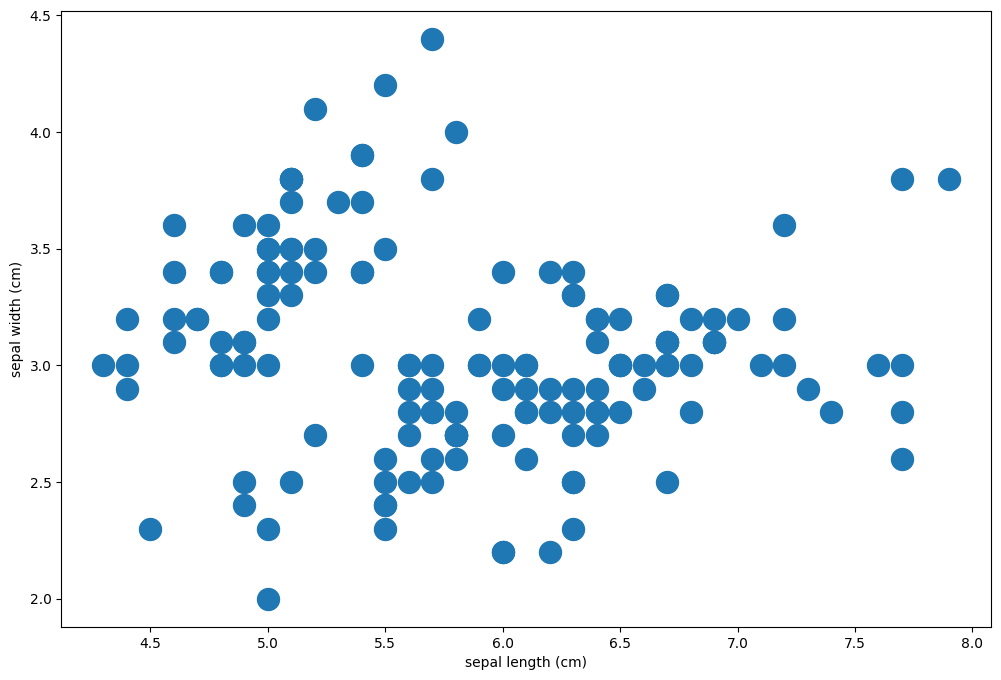

In [29]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], s=250)

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')

plt.show()

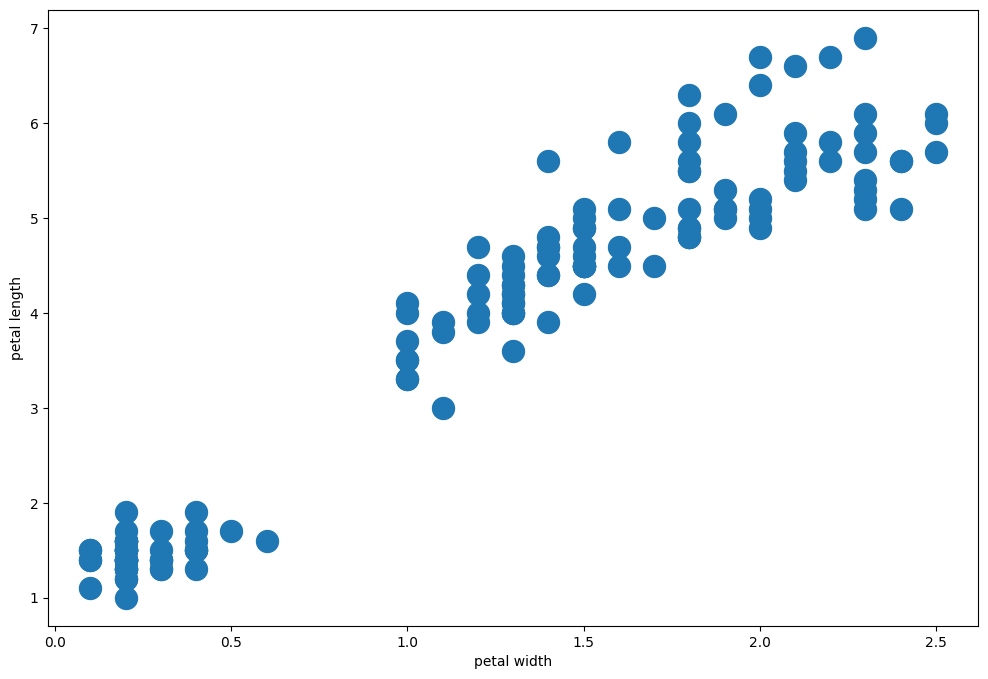

In [31]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(iris_df['petal width (cm)'], iris_df['petal length (cm)'], s=250)

plt.xlabel('petal width')
plt.ylabel('petal length')

plt.show()

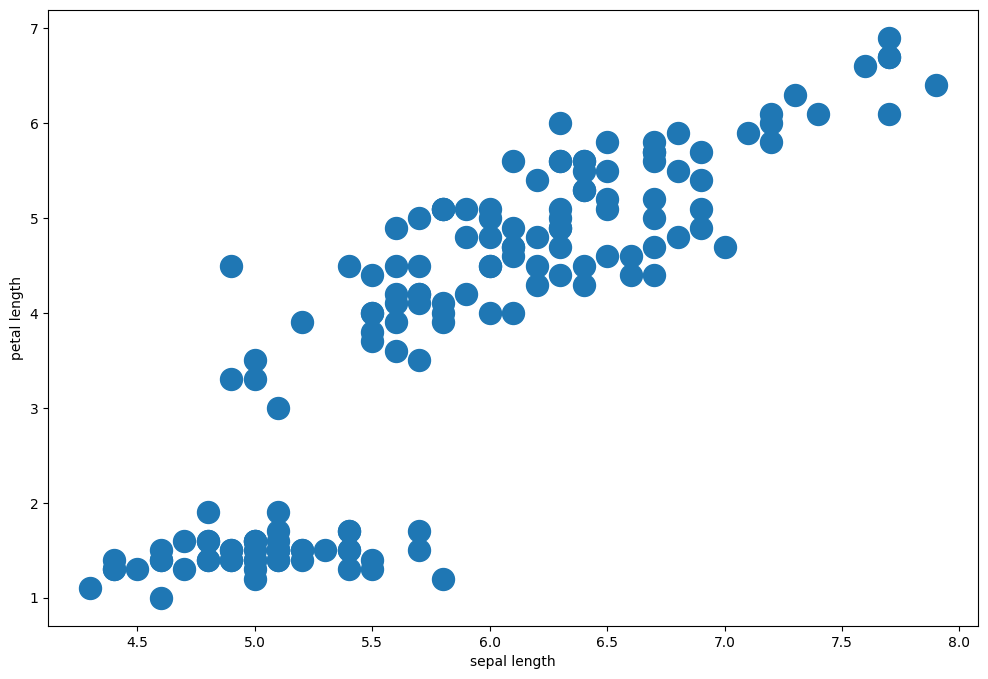

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], s=250)

plt.xlabel('sepal length')
plt.ylabel('petal length')

plt.show()

In [38]:
iris_df_2d = iris_df[['sepal length (cm)', 'petal length (cm)']]

iris_df_2d.sample(5)

,sepal length (cm),petal length (cm)
34,4.4,1.3
136,5.0,1.5
72,4.8,1.6
9,6.5,4.6
84,5.8,4.1


In [39]:
iris_df_2d.shape

(150, 2)

In [40]:
iris_2d = np.array(iris_df_2d)

In [41]:
kmeans_model = KMeans(n_clusters=3, max_iter=1000).fit(iris_2d)

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [42]:
kmeans_model.labels_

array([1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 0, 2, 1, 0, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1,
       0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1,
       2, 0, 1, 0, 2, 0, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2,
       1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [43]:
centroids = kmeans_model.cluster_centers_

centroids

array([[5.00784314, 1.49215686],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

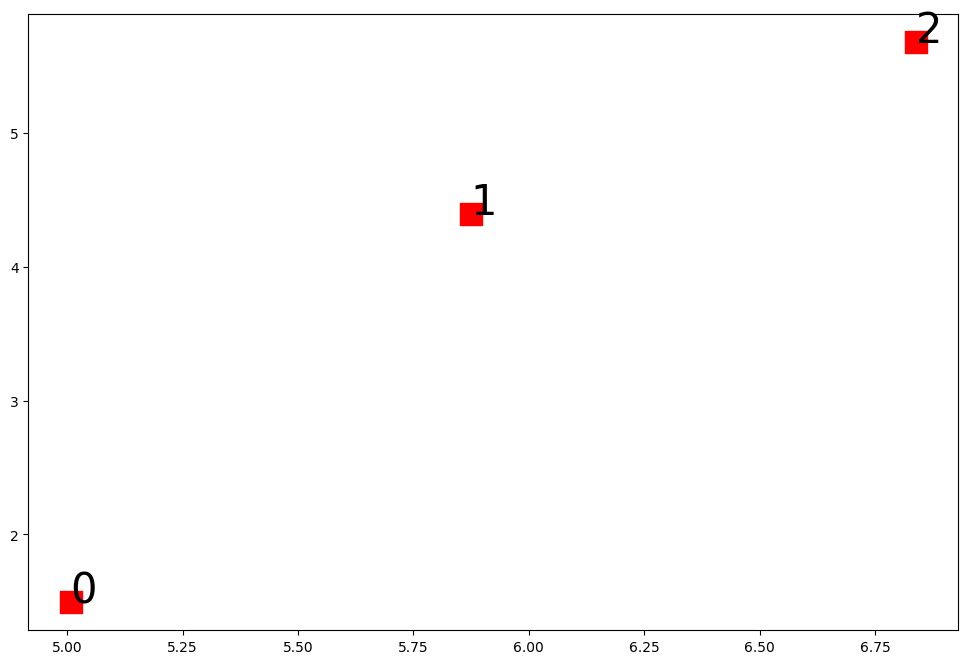

In [44]:
fix, ax = plt.subplots(figsize = (12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=30)

In [46]:
labels = iris_df['class']

In [47]:
print('Homogeneity_score: ', metrics.homogeneity_score(labels, kmeans_model.labels_))

print('Completeness_score: ', metrics.completeness_score(labels, kmeans_model.labels_))

print('v_measure_score: ', metrics.v_measure_score(labels, kmeans_model.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

print('Silhouette_score: ', metrics.silhouette_score(iris_2d, kmeans_model.labels_))

Homogeneity_score:  0.7033177646052958
Completeness_score:  0.7096993707802843
v_measure_score:  0.706494157075837
Adjusted_rand_score:  0.6988627672348092
Adjusted_mutual_info_score:  0.7028024531409134
Silhouette_score:  0.5890584158017611


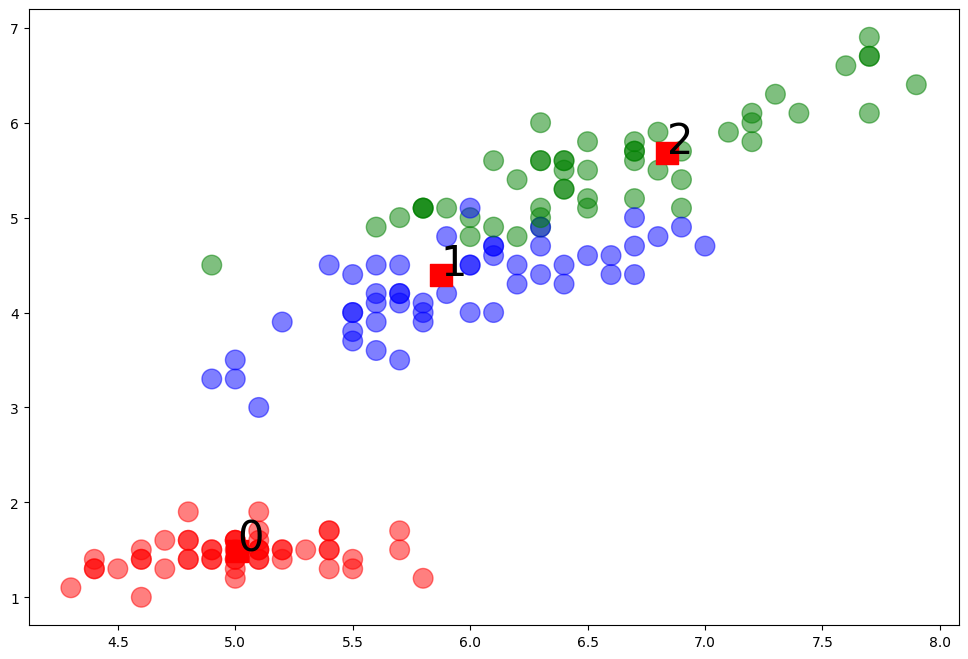

In [48]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12,8))
plt.scatter(iris_df['sepal length (cm)'], iris_df['petal length (cm)'], c=iris_df['class'], s=200, 
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=30)

In [53]:
kmeans_model_new = KMeans(n_clusters=3).fit(iris_features)
labels_new = iris_target['class']

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
kmeans_model_new.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [55]:
kmeans_model_new.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [57]:
print('Homogeneity_score: ', metrics.homogeneity_score(labels_new, kmeans_model_new.labels_))

print('Completeness_score: ', metrics.completeness_score(labels_new, kmeans_model_new.labels_))

print('v_measure_score: ', metrics.v_measure_score(labels_new, kmeans_model_new.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(labels_new, kmeans_model_new.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(labels_new, kmeans_model_new.labels_))

print('Silhouette_score: ', metrics.silhouette_score(iris_features, kmeans_model_new.labels_))

Homogeneity_score:  0.7514854021988338
Completeness_score:  0.7649861514489815
v_measure_score:  0.7581756800057784
Adjusted_rand_score:  0.7302382722834697
Adjusted_mutual_info_score:  0.7551191675800484
Silhouette_score:  0.5528190123564095
